<a href="https://colab.research.google.com/github/shadyvhs/NBA2020/blob/master/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this notebook is to use NBA 2K data and regular season player statistics from the previous two years to determine who the best player in the league is in the current 2020 season while simultaneously exploring some interesting statistcs.

In [2]:
import pandas as pd
import numpy as np

In [4]:
df1=pd.read_csv('nba18.csv', index_col=0)

In [5]:
df2=pd.read_csv('nba19.csv',index_col=0)

In [6]:
df1.head()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Rating
0,Aaron Brooks,Min,PG,33.0,32,5.9,12.3,19.8,0.130,11,0.727,38,0.447,31,0.355,0.486,0.508,2.3,0.5,5.2,0.6,15.0,0.19,0.00,0.34,6.0,103.1,100.4,73.0
1,Aaron Gordon,Orl,SF,22.0,58,32.9,68.6,24.7,0.100,225,0.698,523,0.497,342,0.336,0.500,0.530,17.6,7.9,13.2,2.3,11.7,1.02,0.78,1.84,8.3,103.6,106.2,78.0
2,Aaron Harrison,Dal,SG,23.0,9,25.9,54.0,15.5,0.038,17,0.765,26,0.385,43,0.209,0.341,0.392,6.7,2.7,5.7,1.2,6.7,1.00,0.22,0.33,4.3,87.9,100.8,NaN
3,Aaron Jackson,Hou,F,31.0,1,34.5,71.9,13.9,0.092,2,0.500,5,0.400,4,0.250,0.389,0.405,8.0,3.0,4.9,1.0,4.0,0.00,0.00,1.00,3.3,91.3,101.6,NaN
4,Abdel Nader,Bos,SF,24.0,48,10.9,22.6,17.1,0.170,39,0.590,84,0.321,65,0.354,0.413,0.439,3.0,1.5,7.4,0.5,7.2,0.31,0.21,0.71,4.8,83.1,99.1,68.0


In [7]:
df2.head()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Rating
0,Alex Abrines,Okc,G,25.69,31,19.0,39.5,12.2,7.9,13,0.923,30,0.500,127,0.323,0.487,0.507,5.3,1.5,4.2,0.6,4.3,0.55,0.19,0.45,3.5,103.1,103.9,72.0
1,Quincy Acy,Pho,F,28.51,10,12.3,25.6,9.2,15.2,10,0.700,3,0.667,15,0.133,0.278,0.379,1.7,2.5,11.3,0.8,8.2,0.10,0.40,0.40,4.9,87.1,98.5,71.0
2,Jaylen Adams,Atl,G,22.93,34,12.6,26.2,13.5,19.7,9,0.778,36,0.361,74,0.338,0.459,0.474,3.2,1.8,7.5,1.9,20.2,0.38,0.15,0.82,7.0,99.5,108.1,NaN
3,Steven Adams,Okc,C,25.73,80,33.4,69.5,16.4,12.8,292,0.500,807,0.596,2,0.000,0.595,0.591,13.9,9.5,14.7,1.6,6.6,1.49,0.96,1.73,7.1,119.9,102.7,84.0
4,Bam Adebayo,Mia,C-F,21.73,82,23.3,48.6,15.8,17.1,226,0.735,471,0.588,15,0.200,0.579,0.623,8.9,7.3,16.6,2.2,14.2,0.88,0.79,1.48,9.0,120.0,97.2,78.0


In [8]:
df1 = df1[df1['Rating'].notna()]

In [9]:
df1 = df1[df1['ORTG'].notna()]
df1=df1[df1['DRTG'].notna()]
df1=df1[df1['Effective Shooting percent'].notna()]
df1=df1[df1['True shooting percent'].notna()]

In [10]:
df2 = df2[df2['Rating'].notna()]

In [11]:
df2 = df2[df2['ORTG'].notna()]
df2=df2[df2['DRTG'].notna()]
df2=df2[df2['Effective Shooting percent'].notna()]
df2=df2[df2['True shooting percent'].notna()]

In [12]:
df1.isnull().sum()

Name                          0
Team                          0
Pos                           0
Age                           1
GP                            0
MPG                           0
Minpercent                    0
USG                           0
TOR                           0
FTA                           0
FTpercent                     0
2PA                           0
2Ppercent                     0
3PA                           0
3Ppercent                     0
Effective Shooting percent    0
True shooting percent         0
PPG                           0
RPG                           0
TRB                           0
APG                           0
ASTpercent                    0
SPG                           0
BPG                           0
TOPGTurnovers                 0
Versatility Index             0
ORTG                          0
DRTG                          0
Rating                        0
dtype: int64

In [13]:
df2.isnull().sum()

Name                          0
Team                          0
Pos                           0
Age                           0
GP                            0
MPG                           0
Minpercent                    0
USG                           0
TOR                           0
FTA                           0
FTpercent                     0
2PA                           0
2Ppercent                     0
3PA                           0
3Ppercent                     0
Effective Shooting percent    0
True shooting percent         0
PPG                           0
RPG                           0
TRB                           0
APG                           0
ASTpercent                    0
SPG                           0
BPG                           0
TOPGTurnovers                 0
Versatility Index             0
ORTG                          0
DRTG                          0
Rating                        0
dtype: int64

In [14]:
df_train=df1.append(df2, ignore_index=True)

In [15]:
df_train.head()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Rating
0,Aaron Brooks,Min,PG,33.0,32,5.9,12.3,19.8,0.130,11,0.727,38,0.447,31,0.355,0.486,0.508,2.3,0.5,5.2,0.6,15.0,0.19,0.00,0.34,6.0,103.1,100.4,73.0
1,Aaron Gordon,Orl,SF,22.0,58,32.9,68.6,24.7,0.100,225,0.698,523,0.497,342,0.336,0.500,0.530,17.6,7.9,13.2,2.3,11.7,1.02,0.78,1.84,8.3,103.6,106.2,78.0
2,Abdel Nader,Bos,SF,24.0,48,10.9,22.6,17.1,0.170,39,0.590,84,0.321,65,0.354,0.413,0.439,3.0,1.5,7.4,0.5,7.2,0.31,0.21,0.71,4.8,83.1,99.1,68.0
3,Adreian Payne,Orl,PF,26.0,5,8.5,17.8,15.1,0.137,6,0.833,7,0.714,3,0.667,0.800,0.831,4.2,1.8,11.6,0.0,0.0,0.40,0.00,0.40,0.0,140.6,97.1,71.0
4,Al Horford,Bos,C,31.0,72,31.6,65.9,18.4,0.141,120,0.783,527,0.514,226,0.429,0.553,0.575,12.9,7.4,12.7,4.7,23.6,0.60,1.08,1.83,9.7,115.4,100.4,83.0


In [16]:
df_train.tail()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Rating
819,Trae Young,Atl,G,20.56,81,30.900000,64.4,28.4,17.6,414,0.829,775,0.476,482,0.324,0.480000,0.538000,19.100000,3.700000,6.3,8.100000,40.5,0.860000,0.190000,3.80,10.7,107.5,114.2,77.0
820,Cody Zeller,Cha,F-C,26.51,49,25.400000,52.8,16.2,13.0,141,0.787,323,0.570,22,0.273,0.559000,0.611000,10.100000,6.800000,14.4,2.100000,12.2,0.780000,0.860000,1.24,8.3,123.7,100.3,77.0
821,Tyler Zeller,Atl,C,29.23,6,15.533333,11.1,7.6,0.0,0,0.000,1,0.000,1,0.000,0.558851,0.613333,7.666667,4.000000,29.5,0.700000,10.9,0.166667,0.500000,0.00,0.0,82.4,74.1,76.0
822,Ante Zizic,Cle,C,22.27,59,18.300000,38.2,18.2,13.8,132,0.705,330,0.555,0,0.000,0.555000,0.591000,7.800000,5.400000,16.4,0.900000,7.7,0.220000,0.370000,1.05,7.3,116.2,108.1,73.0
823,Ivica Zubac,Lal,C,22.07,59,17.583051,32.6,20.5,12.9,66,0.864,193,0.580,0,0.000,0.559541,0.604259,8.896610,6.133898,16.3,1.108475,7.3,0.251356,0.864068,1.00,8.3,120.7,97.9,73.0


In [17]:
df_train=df_train[df_train.GP>10]

In [18]:
df_train=df_train[df_train.MPG>5]

In [19]:
y=df_train['Rating']

In [20]:
l=range(3,29)
print(l)

range(3, 29)


In [21]:
Xdf=df_train.iloc[:,l]

In [22]:
correlation_matrix=Xdf.astype(float).corr()

In [23]:
correlation_matrix

,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Rating
Age,1.000000,0.008239,0.024064,0.028886,-0.060251,0.100957,-0.048869,0.153754,-0.082679,0.015383,0.058879,0.053441,0.094074,0.109160,-0.001553,-0.015819,-0.021012,0.070956,0.085225,-0.002478,-0.046340,-0.015457,0.042361,0.128710,0.056493,0.191559
GP,0.008239,1.000000,0.554816,0.553973,0.124929,-0.061192,0.501268,0.204742,0.588465,0.214247,0.509540,0.189666,0.338347,0.366066,0.432534,0.363632,0.024689,0.243824,0.087793,0.347364,0.230379,0.305037,0.203155,0.362878,0.125819,0.295306
MPG,0.024064,0.554816,1.000000,0.988246,0.467487,-0.034072,0.697886,0.239481,0.749629,0.043666,0.646986,0.305377,0.169207,0.239766,0.864957,0.574011,-0.061121,0.651385,0.382605,0.735672,0.321465,0.750676,0.422977,0.215054,0.330420,0.700848
Minpercent,0.028886,0.553973,0.988246,1.000000,0.458707,-0.031655,0.694761,0.253600,0.748010,0.056714,0.646286,0.317442,0.169840,0.236845,0.851345,0.568137,-0.061986,0.638772,0.383059,0.726865,0.319956,0.752725,0.431630,0.244416,0.335428,0.694044
USG,-0.060251,0.124929,0.467487,0.458707,1.000000,-0.016562,0.647839,0.231105,0.634755,-0.031518,0.413936,0.158574,-0.053940,0.066651,0.780809,0.335596,0.042481,0.521959,0.509777,0.363409,0.154494,0.720266,0.679291,-0.013017,0.090840,0.635584
TOR,0.100957,-0.061192,-0.034072,-0.031655,-0.016562,1.000000,0.003606,-0.035587,-0.040272,0.037541,-0.041063,-0.039023,0.000407,0.003017,-0.016368,0.034493,0.035233,0.115143,0.147937,0.001083,-0.003420,0.076274,0.175858,0.027986,0.046262,0.050791
FTA,-0.048869,0.501268,0.697886,0.694761,0.647839,0.003606,1.000000,0.148428,0.881564,0.184241,0.493571,0.071932,0.189553,0.318057,0.852871,0.632411,0.202447,0.560561,0.406771,0.524444,0.432624,0.757213,0.639532,0.297503,0.049289,0.719526
FTpercent,0.153754,0.204742,0.239481,0.253600,0.231105,-0.035587,0.148428,1.000000,0.135521,-0.109377,0.384469,0.377354,0.013442,0.146920,0.282759,-0.050701,-0.238944,0.163421,0.167604,0.116648,-0.125544,0.151612,0.128195,0.230158,0.213775,0.158993
2PA,-0.082679,0.588465,0.749629,0.748010,0.634755,-0.040272,0.881564,0.135521,1.000000,0.182515,0.448705,0.081202,0.183999,0.260652,0.841283,0.641522,0.188340,0.547845,0.387767,0.533292,0.429132,0.724872,0.611533,0.259003,0.104356,0.677429
2Ppercent,0.015383,0.214247,0.043666,0.056714,-0.031518,0.037541,0.184241,-0.109377,0.182515,1.000000,-0.098491,-0.222981,0.719143,0.691941,0.094908,0.345577,0.419818,-0.078669,-0.118023,-0.037532,0.384246,0.029259,0.221464,0.686784,-0.313134,0.127067


In [24]:
correlated_features = [[] for _ in range(26)]
for i in range(0,26):
    correlated_features[i].append(i)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.80:
            colname1 = correlation_matrix.columns[i]
            colname2=correlation_matrix.columns[j]
            if(i!=j):  
                correlated_features[i].append(colname2)

In [25]:
dic={}
count=0
for i in Xdf.columns:
  dic[count]=i
  count+=1

In [26]:
for i in range(0,len(correlated_features)):
  correlated_features[i][0]=dic[i]
for i in correlated_features:
  print(i)

['Age']
['GP']
['MPG', 'Minpercent', 'PPG']
['Minpercent', 'MPG', 'PPG']
['USG']
['TOR']
['FTA', '2PA', 'PPG']
['FTpercent']
['2PA', 'FTA', 'PPG']
['2Ppercent']
['3PA']
['3Ppercent']
['Effective Shooting percent', 'True shooting percent']
['True shooting percent', 'Effective Shooting percent']
['PPG', 'MPG', 'Minpercent', 'FTA', '2PA', 'TOPGTurnovers', 'Rating']
['RPG']
['TRB']
['APG', 'ASTpercent', 'TOPGTurnovers']
['ASTpercent', 'APG']
['SPG']
['BPG']
['TOPGTurnovers', 'PPG', 'APG']
['Versatility Index']
['ORTG']
['DRTG']
['Rating', 'PPG']


In [27]:
l1=[]
for i in sorted(correlation_matrix.iloc[25,:]):
  for j in range(0,26):
    if correlation_matrix.iloc[25,j]==i:
      l1.append(dic[j])
for i in range(len(l1)-1,-1,-1):
  print(l1[i])

Rating
PPG
TOPGTurnovers
FTA
MPG
Minpercent
2PA
USG
Versatility Index
APG
RPG
SPG
3PA
ASTpercent
BPG
GP
True shooting percent
ORTG
Age
TRB
FTpercent
Effective Shooting percent
2Ppercent
3Ppercent
DRTG
TOR


In [28]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(Xdf.astype(float))

df_mm = pd.DataFrame(df_mm, columns=Xdf.columns)

In [29]:
df_mm.head()

,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Rating
0,0.603188,0.295775,0.025157,0.058309,0.355140,0.003757,0.012821,0.727,0.027206,0.447,0.030156,0.355,0.576857,0.529644,0.047887,0.011059,0.196226,0.047170,0.301205,0.080851,0.000000,0.067460,0.387097,0.699932,0.518703,0.242424
1,0.129255,0.661972,0.874214,0.879009,0.507788,0.002890,0.262238,0.698,0.383824,0.497,0.332685,0.336,0.601036,0.573123,0.478873,0.483199,0.498113,0.207547,0.234940,0.434043,0.289963,0.365079,0.535484,0.703327,0.663342,0.393939
2,0.215424,0.521127,0.182390,0.208455,0.271028,0.004913,0.045455,0.590,0.061029,0.321,0.063230,0.354,0.450777,0.393281,0.067606,0.074862,0.279245,0.037736,0.144578,0.131915,0.078067,0.140873,0.309677,0.564155,0.486284,0.090909
3,0.517019,0.859155,0.833333,0.839650,0.311526,0.004075,0.139860,0.783,0.386765,0.514,0.219844,0.429,0.692573,0.662055,0.346479,0.451297,0.479245,0.433962,0.473896,0.255319,0.401487,0.363095,0.625806,0.783435,0.518703,0.545455
4,0.603188,0.352113,0.261006,0.287172,0.442368,0.002486,0.041958,0.833,0.150000,0.541,0.002918,0.000,0.659758,0.638340,0.180282,0.234368,0.630189,0.066038,0.202811,0.187234,0.237918,0.115079,0.541935,0.766463,0.356608,0.303030


We use the features most correlated to the Rating

In [30]:
cols=['PPG','TOPGTurnovers','FTA','MPG','2PA','USG','Versatility Index','APG','RPG','SPG','3PA','BPG','GP','True shooting percent']

In [31]:
df_mm=df_mm[cols]

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
X_trainForBestFeatures, X_testForBestFeatures, y_trainForBestFeatures, y_testForBestFeatures =\
    train_test_split(df_mm, y, 
                     test_size=0.2, 
                     random_state=0, 
                )

In [34]:
X_trainForBestFeatures.shape, X_testForBestFeatures.shape, y_trainForBestFeatures.shape, y_testForBestFeatures.shape

((615, 14), (154, 14), (615,), (154,))

In [35]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow import keras

In [36]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_trainForBestFeatures.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
# opt = keras.optimizers.Adam(learning_rate=0.01)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 199,553
Trainable params: 199,553
Non-trainable params: 0
__________________________________________________

In [37]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [38]:
NN_model.fit(X_trainForBestFeatures, y_trainForBestFeatures, epochs=300, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/300
11/16 [===================>..........] - ETA: 0s - loss: 75.8671 - mean_absolute_error: 75.8671
Epoch 00001: val_loss improved from inf to 69.32671, saving model to Weights-001--69.32671.hdf5
16/16 [==============================] - 0s 21ms/step - loss: 75.1565 - mean_absolute_error: 75.1565 - val_loss: 69.3267 - val_mean_absolute_error: 69.3267
Epoch 2/300
13/16 [=======================>......] - ETA: 0s - loss: 43.7114 - mean_absolute_error: 43.7114
Epoch 00002: val_loss improved from 69.32671 to 15.67557, saving model to Weights-002--15.67557.hdf5
16/16 [==============================] - 0s 10ms/step - loss: 41.1220 - mean_absolute_error: 41.1220 - val_loss: 15.6756 - val_mean_absolute_error: 15.6756
Epoch 3/300
15/16 [===========================>..] - ETA: 0s - loss: 14.4434 - mean_absolute_error: 14.4434
Epoch 00003: val_loss improved from 15.67557 to 12.67177, saving model to Weights-003--12.67177.hdf5
16/16 [==============================] - 0s 9ms/step - loss: 14.40

In [39]:
wights_file =  'Weights-098--2.01167.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [40]:
NN_model.evaluate(X_testForBestFeatures,y_testForBestFeatures)

5/5 [==============================] - 0s 2ms/step - loss: 2.6317 - mean_absolute_error: 2.6317


[2.631742477416992, 2.631742477416992]

In [41]:
df3=pd.read_csv('nba20.csv',index_col=0)

In [42]:
df3.head()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG
FULL NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Steven Adams,Steven Adams,Okc,C,26.64,58,27.0,56.2,17.2,14.3,183,0.590,440,0.593,3,0.333,0.593,0.605,10.9,9.4,19.3,2.4,13.5,0.86,1.12,1.50,9.3,123.0,102.2
Bam Adebayo,Bam Adebayo,Mia,C-F,22.65,65,34.4,71.6,20.8,17.4,342,0.690,707,0.576,13,0.077,0.567,0.605,16.2,10.5,17.2,5.1,23.6,1.20,1.31,2.83,11.1,117.3,102.2
LaMarcus Aldridge,LaMarcus Aldridge,San,F-C,34.65,53,33.1,68.9,23.6,7.8,191,0.827,637,0.518,157,0.389,0.531,0.570,18.9,7.4,12.0,2.4,11.4,0.68,1.64,1.40,8.4,114.5,109.3
Nickeil Alexander-Walker,Nickeil Alexander-Walker,Nor,G,21.52,41,12.2,25.4,22.8,14.3,28,0.607,110,0.336,117,0.342,0.427,0.441,5.1,2.0,8.4,1.8,20.4,0.27,0.17,0.98,8.6,90.7,106.5
Grayson Allen,Grayson Allen,Mem,G,24.43,30,16.6,34.6,17.9,10.7,35,0.857,85,0.541,91,0.363,0.543,0.577,7.4,2.2,7.0,1.4,11.8,0.23,0.03,0.77,6.8,110.9,109.1


In [43]:
df3.shape

(514, 28)

In [44]:
l=range(0,514)

In [45]:
df3.index=l

In [46]:
df3.head()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG
0,Steven Adams,Okc,C,26.64,58,27.0,56.2,17.2,14.3,183,0.590,440,0.593,3,0.333,0.593,0.605,10.9,9.4,19.3,2.4,13.5,0.86,1.12,1.50,9.3,123.0,102.2
1,Bam Adebayo,Mia,C-F,22.65,65,34.4,71.6,20.8,17.4,342,0.690,707,0.576,13,0.077,0.567,0.605,16.2,10.5,17.2,5.1,23.6,1.20,1.31,2.83,11.1,117.3,102.2
2,LaMarcus Aldridge,San,F-C,34.65,53,33.1,68.9,23.6,7.8,191,0.827,637,0.518,157,0.389,0.531,0.570,18.9,7.4,12.0,2.4,11.4,0.68,1.64,1.40,8.4,114.5,109.3
3,Nickeil Alexander-Walker,Nor,G,21.52,41,12.2,25.4,22.8,14.3,28,0.607,110,0.336,117,0.342,0.427,0.441,5.1,2.0,8.4,1.8,20.4,0.27,0.17,0.98,8.6,90.7,106.5
4,Grayson Allen,Mem,G,24.43,30,16.6,34.6,17.9,10.7,35,0.857,85,0.541,91,0.363,0.543,0.577,7.4,2.2,7.0,1.4,11.8,0.23,0.03,0.77,6.8,110.9,109.1


In [47]:
df3.isnull().sum()

Name                           0
Team                           0
Pos                            0
Age                            0
GP                             0
MPG                            0
Minpercent                     0
USG                            0
TOR                            4
FTA                            0
FTpercent                      0
2PA                            0
2Ppercent                      0
3PA                            0
3Ppercent                      0
Effective Shooting percent     7
True shooting percent          5
PPG                            0
RPG                            0
TRB                            0
APG                            0
ASTpercent                     0
SPG                            0
BPG                            0
TOPGTurnovers                  0
Versatility Index              0
ORTG                          33
DRTG                          33
dtype: int64

In [48]:
df3 = df3[df3['ORTG'].notna()]
df3=df3[df3['DRTG'].notna()]
df3=df3[df3['Effective Shooting percent'].notna()]
df3=df3[df3['True shooting percent'].notna()]

In [49]:
dftemp=df3

Statistics on Age distribution of players in the NBA. A peak is seen at around 24 years of age.
Average age=26.91 years
Vince Carter is the oldest player at 43.11 years.
Sekou Doumbouya is the youngest player at only 19.22 years.

Max Age:
43.12
Name    Vince Carter
Team             Atl
Name: 86, dtype: object
Min Age:
19.22
Name    Sekou Doumbouya
Team                Det
Name: 131, dtype: object
Avg Age:
26.294416666666677


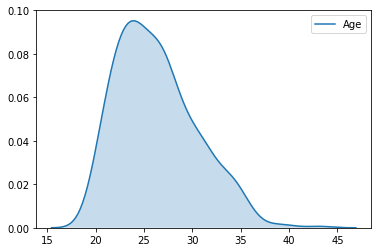

In [50]:
#Age statistics
print("Max Age:")
print(dftemp.Age.max())
print(dftemp[dftemp.Age>=dftemp.Age.max()].iloc[0,[0,1]])
print("Min Age:")
print(dftemp.Age.min())
print(dftemp[dftemp.Age<=dftemp.Age.min()].iloc[0,[0,1]])
print("Avg Age:")
print(dftemp.Age.mean())
sns.kdeplot(data=dftemp.Age, shade=True)

Ten youngest players in the NBA

In [51]:
dftemp.sort_values(by=['Age']).head(10)

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG
131,Sekou Doumbouya,Det,F,19.22,38,19.8,41.3,16.9,12.0,46,0.674,138,0.464,98,0.286,0.449,0.474,6.4,3.1,8.9,0.5,3.7,0.53,0.21,0.92,4.3,90.3,105.2
441,Alen Smailagic,Gol,F,19.56,14,9.9,20.7,18.3,18.5,19,0.842,27,0.630,13,0.231,0.538,0.610,4.2,1.9,10.5,0.9,14.3,0.21,0.29,0.79,7.8,111.9,107.7
503,Zion Williamson,Nor,F,19.68,19,29.7,61.9,29.7,12.4,152,0.645,279,0.595,13,0.462,0.599,0.624,23.6,6.8,12.0,2.2,12.6,0.84,0.47,2.68,9.5,115.2,110.1
26,RJ Barrett,Nyk,F-G,19.74,56,30.4,63.4,24.0,12.9,254,0.614,530,0.432,197,0.320,0.445,0.479,14.3,5.0,8.8,2.6,12.8,0.95,0.30,2.21,7.5,94.5,109.3
283,Jalen Lecque,Pho,G,19.74,4,6.6,13.8,19.1,8.4,2,1.000,6,0.667,4,0.000,0.400,0.460,2.5,0.0,0.0,0.5,10.9,0.00,0.00,0.25,0.0,93.9,112.7
32,Darius Bazley,Okc,F-G,19.75,53,17.2,35.7,14.1,13.8,47,0.681,130,0.446,100,0.300,0.448,0.475,4.5,3.7,12.0,0.5,4.3,0.38,0.66,0.75,4.7,90.2,105.8
202,Jaxson Hayes,Nor,C-F,19.80,56,17.0,35.4,15.2,11.6,173,0.630,232,0.664,4,0.250,0.659,0.673,7.5,4.0,12.4,0.9,7.5,0.41,0.96,0.73,7.1,129.6,100.1
396,Kevin Porter Jr.,Cle,G-F,19.85,50,23.2,48.4,20.6,16.7,101,0.723,263,0.506,158,0.335,0.505,0.535,10.0,3.2,7.7,2.2,13.9,0.92,0.28,1.86,7.1,99.1,105.5
492,Coby White,Chi,G,20.07,65,25.8,53.7,24.4,11.4,129,0.791,416,0.430,376,0.354,0.478,0.506,13.2,3.6,7.6,2.7,16.6,0.75,0.09,1.68,7.8,99.8,108.3
291,Nassir Little,Por,F-G,20.08,48,11.9,24.8,13.7,8.1,44,0.636,92,0.554,59,0.237,0.477,0.505,3.6,2.3,9.8,0.5,5.1,0.27,0.31,0.31,5.4,107.8,105.2


Creating a new dataframe comprising solely of 'young' players:players below the age of 25

In [52]:
young=dftemp[dftemp.Age<25]
young.shape

(210, 28)

The following dataframe shows young players with the best PPG in the league

In [53]:
young.loc[:,['Name','Team','PPG']].sort_values(by=['PPG'],ascending=False).head(10)

,Name,Team,PPG
510,Trae Young,Atl,29.6
128,Luka Doncic,Dal,28.7
462,Karl-Anthony Towns,Min,26.5
52,Devin Booker,Pho,26.1
233,Brandon Ingram,Nor,24.3
335,Donovan Mitchell,Uta,24.2
451,Jayson Tatum,Bos,23.6
503,Zion Williamson,Nor,23.6
103,John Collins,Atl,21.6
433,Collin Sexton,Cle,20.8


We next display the young players who spent most time on the court for their team, sorting them by minutes played.

In [54]:
young['Total Minutes']=young['MPG']*young['Minpercent']
young.loc[:,['Name','Team','Total Minutes']].sort_values(by=['Total Minutes'],ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Team,Total Minutes
52,Devin Booker,Pho,2718.33
439,Ben Simmons,Phi,2667.10
510,Trae Young,Atl,2598.08
169,Shai Gilgeous-Alexander,Okc,2569.32
424,Domantas Sabonis,Ind,2523.00
451,Jayson Tatum,Bos,2494.66
377,Kelly Oubre Jr.,Pho,2480.55
335,Donovan Mitchell,Uta,2463.04
1,Bam Adebayo,Mia,2463.04
233,Brandon Ingram,Nor,2449.02


Displaying the young players with maximum no. of assists per game

In [55]:
young.loc[:,['Name','Team','APG']].sort_values(by=['APG'],ascending=False).head(10)

,Name,Team,APG
510,Trae Young,Atl,9.3
128,Luka Doncic,Dal,8.7
439,Ben Simmons,Phi,8.2
22,Lonzo Ball,Nor,6.9
341,Ja Morant,Mem,6.9
154,De'Aaron Fox,Sac,6.7
52,Devin Booker,Pho,6.6
158,Markelle Fultz,Orl,5.2
1,Bam Adebayo,Mia,5.1
424,Domantas Sabonis,Ind,5.0


Displaying the young players with maximum no. of blocks per game

In [56]:
young.loc[:,['Name','Team','BPG']].sort_values(by=['BPG'],ascending=False).head(10)

,Name,Team,BPG
235,Jonathan Isaac,Orl,2.44
468,Myles Turner,Ind,2.18
400,Kristaps Porzingis,Dal,2.08
416,Mitchell Robinson,Nyk,1.95
19,Deandre Ayton,Pho,1.70
237,Jaren Jackson Jr.,Mem,1.61
103,John Collins,Atl,1.61
392,Jakob Poeltl,San,1.47
23,Mo Bamba,Orl,1.40
5,Jarrett Allen,Bro,1.33


Displaying the young players with maximum no. of rebounds per game

In [57]:
young.loc[:,['Name','Team','RPG']].sort_values(by=['RPG'],ascending=False).head(10)

,Name,Team,RPG
424,Domantas Sabonis,Ind,12.4
19,Deandre Ayton,Pho,12.0
462,Karl-Anthony Towns,Min,10.8
1,Bam Adebayo,Mia,10.5
103,John Collins,Atl,10.1
5,Jarrett Allen,Bro,9.5
400,Kristaps Porzingis,Dal,9.5
84,Wendell Carter Jr.,Chi,9.4
128,Luka Doncic,Dal,9.3
439,Ben Simmons,Phi,7.9


Displaying the young players with maximum no. of steals per game

In [58]:
young.loc[:,['Name','Team','SPG']].sort_values(by=['SPG'],ascending=False).head(10)

,Name,Team,SPG
439,Ben Simmons,Phi,2.15
349,Dejounte Murray,San,1.72
235,Jonathan Isaac,Orl,1.56
61,Mikal Bridges,Pho,1.48
22,Lonzo Ball,Nor,1.45
154,De'Aaron Fox,Sac,1.42
451,Jayson Tatum,Bos,1.42
15,OG Anunoby,Tor,1.41
459,Matisse Thybulle,Phi,1.39
127,Donte DiVincenzo,Mil,1.37


We now proceed to use our neural network trained on 2K ratings from the 2018 and 2019 seasons to determine the best young player in the current NBA season

In [59]:
normal_young=mm_scaler.fit_transform(young.loc[:,cols].astype(float))
normal_young = pd.DataFrame(normal_young, columns=cols)

In [60]:
resyoung=NN_model.predict(normal_young.loc[:,cols])

In [61]:
young['Ratings']=resyoung
young=young.sort_values(by=['Ratings'],ascending=False)
young.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,Total Minutes,Ratings
128,Luka Doncic,Dal,G-F,21.03,54,33.3,69.4,37.0,14.7,491,0.752,619,0.575,491,0.318,0.532,0.584,28.7,9.3,14.6,8.7,45.3,1.06,0.19,4.22,15.9,115.6,102.9,2311.02,100.085464
510,Trae Young,Atl,G,21.48,60,35.3,73.6,34.9,16.2,559,0.860,681,0.501,568,0.361,0.519,0.595,29.6,4.2,6.4,9.3,45.6,1.08,0.13,4.80,11.9,113.4,115.2,2598.08,97.050453
462,Karl-Anthony Towns,Min,C-F,24.32,35,33.9,70.7,28.8,13.2,226,0.796,345,0.586,277,0.412,0.600,0.642,26.5,10.8,16.8,4.4,22.8,0.94,1.20,3.14,12.7,120.2,104.0,2396.73,96.728935
439,Ben Simmons,Phi,F,23.64,54,35.8,74.5,20.9,20.5,284,0.627,612,0.587,6,0.333,0.586,0.607,16.7,7.9,12.1,8.2,34.8,2.15,0.59,3.56,11.5,115.8,100.3,2667.10,91.801369
451,Jayson Tatum,Bos,F-G,22.03,59,34.6,72.1,28.6,9.6,279,0.806,694,0.478,420,0.398,0.523,0.562,23.6,7.1,11.0,2.9,14.0,1.42,0.90,2.22,9.1,110.3,103.3,2494.66,90.324974
19,Deandre Ayton,Pho,C,21.64,30,33.2,69.2,24.3,12.4,78,0.769,462,0.552,3,0.000,0.548,0.571,19.0,12.0,20.1,1.9,9.7,0.70,1.70,2.37,9.1,109.3,102.9,2297.44,90.134041
400,Kristaps Porzingis,Dal,F-C,24.61,51,31.3,65.2,26.6,8.5,228,0.776,447,0.477,361,0.349,0.498,0.540,19.2,9.5,15.8,1.7,8.6,0.71,2.08,1.65,8.6,108.5,100.6,2040.76,89.887939
52,Devin Booker,Pho,G,23.36,62,36.1,75.3,29.5,15.7,442,0.916,768,0.544,350,0.360,0.543,0.617,26.1,4.1,6.4,6.6,30.2,0.71,0.26,3.94,9.9,114.1,108.0,2718.33,89.662300
103,John Collins,Atl,F,22.47,41,33.2,69.3,22.7,10.1,150,0.800,458,0.642,147,0.401,0.632,0.659,21.6,10.1,16.4,1.5,7.6,0.76,1.61,1.83,8.3,123.1,106.6,2300.76,89.294609
233,Brandon Ingram,Nor,F,22.52,56,34.3,71.4,28.2,13.1,330,0.858,652,0.509,354,0.387,0.534,0.590,24.3,6.2,9.6,4.3,19.8,1.00,0.64,3.09,10.1,111.9,106.5,2449.02,89.239281


In [62]:
young=young.loc[:,['Name','Ratings']].sort_values(by=['Ratings'],ascending=False)

Our neural network determines Luka Doncic, last season's Rookie of the Year, to be the best young player in the NBA with Trae Young and Karl-Anthony Towns closing out the top 3

In [63]:
young.loc[:,'Name'].head(10)

128           Luka Doncic
510            Trae Young
462    Karl-Anthony Towns
439           Ben Simmons
451          Jayson Tatum
19          Deandre Ayton
400    Kristaps Porzingis
52           Devin Booker
103          John Collins
233        Brandon Ingram
Name: Name, dtype: object

We now go back to our regular dataset and continue our analysis. James Harden once again leads the league in PPG with 34.4 points per game. The league average is 8.97.

8.975024591537766
34.4
Name    James Harden
Team             Hou
Name: 191, dtype: object


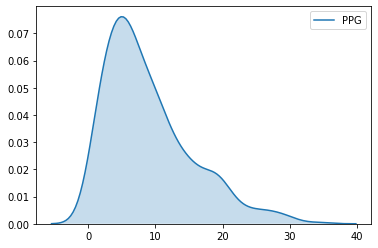

In [64]:
sns.kdeplot(data=dftemp.PPG, shade=True)
print(dftemp.PPG.mean())
print(dftemp.PPG.max())
print(dftemp[dftemp.PPG>=dftemp.PPG.max()].iloc[0,[0,1]])

Next, we see some basic stats on two pointers and three pointers

In [65]:
print("Total two pointers attempted:")
print(dftemp['2PA'].sum())
df_temp=dftemp
df_temp['2 pointers scored']=df_temp['2PA']*df_temp['2Ppercent']
df_temp['3 pointers scored']=df_temp['3PA']*df_temp['3Ppercent']
print("Total points through two pointers:")
print((df_temp['2 pointers scored'].sum())*2)
print("Total three pointers attempted:")
print(dftemp['3PA'].sum())
print("Total points through three pointers:")
print((df_temp['3 pointers scored'].sum())*3)

Total two pointers attempted:
104280
Total points through two pointers:
109031.68599999999
Total three pointers attempted:
64030
Total points through three pointers:
68730.85800000001


In [66]:
print("Average two point accuracy:")
print(dftemp['2Ppercent'].mean())
print("Average three point accuracy:")
print(dftemp['3Ppercent'].mean())
print("Average points scored per two point attempt:")
print(dftemp['2Ppercent'].mean()*2)
print("Average points scored per three point attempt:")
print(dftemp['3Ppercent'].mean()*3)

Average two point accuracy:
0.5041624999999998
Average three point accuracy:
0.3009729166666668
Average points scored per two point attempt:
1.0083249999999997
Average points scored per three point attempt:
0.9029187500000004


The NBA is in the midst of a three point revolution. The number of three point shots attempted per game is far more than what it was only a decade ago. Still the averge points gained by a player per 2 point attemp still outweighs the avergae points per 3 point attempt because of the drop in accuracy. An accurate three point shooter can can create a big difference.

LeBron James leads the league in assists per game coming in at an impressive 10.6 assists with the mean at around 2.

1.9782973161614785
10.6
Name    LeBron James
Team             Lal
Name: 243, dtype: object


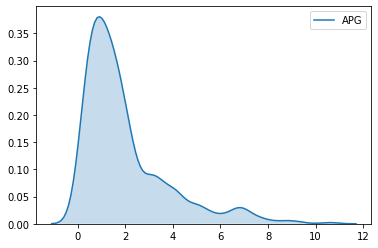

In [67]:
sns.kdeplot(data=dftemp.APG, shade=True)
print(dftemp.APG.mean())
print(dftemp.APG.max())
print(dftemp[dftemp.APG>=dftemp.APG.max()].iloc[0,[0,1]])

Ben Simmons of the 76ers leads the league in Steals Per Game.

0.6276838175833436
2.15
Name    Ben Simmons
Team            Phi
Name: 439, dtype: object


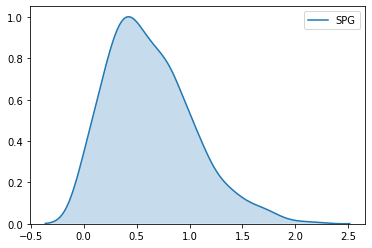

In [68]:
sns.kdeplot(data=dftemp.SPG, shade=True)
print(dftemp.SPG.mean())
print(dftemp.SPG.max())
print(dftemp[dftemp.SPG>=dftemp.SPG.max()].iloc[0,[0,1]])

Hassan Whiteside of the Trailblazers recorded 3.07 blocks per game to lead the league in blocks per gae.

0.4089095543386162
3.07
Name    Hassan Whiteside
Team                 Por
Name: 494, dtype: object


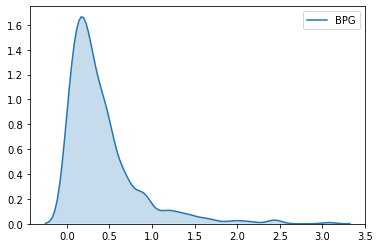

In [69]:
sns.kdeplot(data=dftemp.BPG, shade=True)
print(dftemp.BPG.mean())
print(dftemp.BPG.max())
print(dftemp[dftemp.BPG>=dftemp.BPG.max()].iloc[0,[0,1]])

Hassan Whiteside also led the league in rebounds per game, racking up 14.2 per game with a league average of 3.71.

3.712570165150989
14.2
Name    Hassan Whiteside
Team                 Por
Name: 494, dtype: object


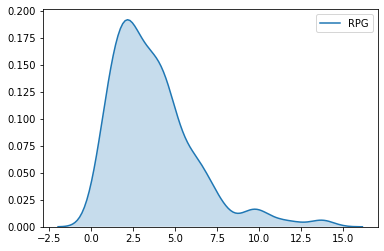

In [70]:
sns.kdeplot(data=dftemp.RPG, shade=True)
print(dftemp.RPG.mean())
print(dftemp.RPG.max())
print(dftemp[dftemp.RPG>=dftemp.RPG.max()].iloc[0,[0,1]])

George Hill specialised in 3 pointers as he achieved an accuracy of 0.48 while having attempts greater than the league's average.

0.3645263157894735
0.48
Name    George Hill
Team            Mil
Name: 212, dtype: object


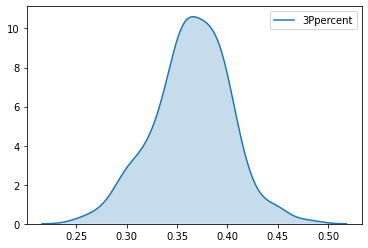

In [71]:
df_temp=dftemp[dftemp["3PA"]>dftemp["3PA"].mean()]
sns.kdeplot(data=df_temp["3Ppercent"], shade=True)
print(df_temp["3Ppercent"].mean())
print(df_temp["3Ppercent"].max())
print(df_temp[df_temp["3Ppercent"]>=df_temp["3Ppercent"].max()].iloc[0,[0,1]])

In [72]:
df_temp.loc[:,['Name','Team','3Ppercent']].sort_values(by=['3Ppercent'],ascending=False).head(10)

,Name,Team,3Ppercent
212,George Hill,Mil,0.480
114,Seth Curry,Dal,0.453
408,JJ Redick,Nor,0.452
413,Duncan Robinson,Mia,0.448
318,Doug McDermott,Ind,0.445
343,Marcus Morris Sr.,Nyk,0.439
372,Kelly Olynyk,Mia,0.432
217,Justin Holiday,Ind,0.424
39,Davis Bertans,Was,0.424
44,Nemanja Bjelica,Sac,0.422


Determining which player was fouled the most.

In [73]:
dftemp.loc[:,['Name','Team','FTA']].sort_values(by=['FTA'],ascending=False).head(10)

,Name,Team,FTA
191,James Harden,Hou,719
11,Giannis Antetokounmpo,Mil,570
510,Trae Young,Atl,559
128,Luka Doncic,Dal,491
78,Jimmy Butler,Mia,490
33,Bradley Beal,Was,458
117,Anthony Davis,Lal,457
126,Spencer Dinwiddie,Bro,446
52,Devin Booker,Pho,442
290,Damian Lillard,Por,438


James Harden seems to be leading the pack by a considerable margin. The following chart sums it up better though.

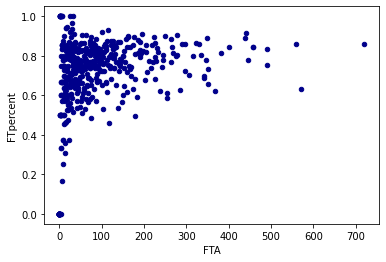

In [74]:
ax1 = dftemp.plot.scatter(x='FTA',
                      y='FTpercent',
                      c='DarkBlue')

James Harden appears all the way to the end, far ahead of the pack, apparently drawing 149 more fouls than second placed Giannis Antetokounmpo

Graphing three point attempts by players

In [75]:
dftemp.loc[:,['Name','Team','3PA']].sort_values(by=['3PA'],ascending=False).head(10)

,Name,Team,3PA
191,James Harden,Hou,769
211,Buddy Hield,Sac,618
174,Devonte' Graham,Cha,585
290,Damian Lillard,Por,573
510,Trae Young,Atl,568
413,Duncan Robinson,Mia,543
128,Luka Doncic,Dal,491
279,Zach LaVine,Chi,484
33,Bradley Beal,Was,481
39,Davis Bertans,Was,472


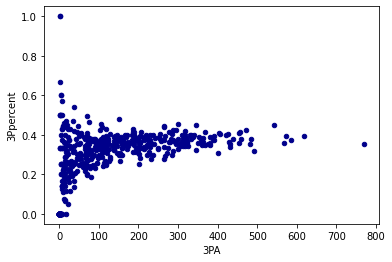

In [76]:
ax1 = dftemp.plot.scatter(x='3PA',
                      y='3Ppercent',
                      c='DarkBlue')

James Harden, here too takes far more 3 pointers than any other player but doesn't boast of a similar stat in terms of accuracy.

In [77]:
temp=dftemp
temp['Minutes']=temp['GP']*temp['MPG']
temp=temp[temp['Minutes']>temp.Minutes.mean()]
temp.loc[:,['Name','Team','True shooting percent']].sort_values(by=['True shooting percent'],ascending=False).head(10)

,Name,Team,True shooting percent
416,Mitchell Robinson,Nyk,0.726
170,Rudy Gobert,Uta,0.700
224,Dwight Howard,Lal,0.696
219,Richaun Holmes,Sac,0.683
258,DeAndre Jordan,Bro,0.682
413,Duncan Robinson,Mia,0.678
401,Dwight Powell,Dal,0.677
96,Brandon Clarke,Mem,0.673
212,George Hill,Mil,0.668
103,John Collins,Atl,0.659


Finally, we proceed towards our main objective, using the trained neural network to determine the MVP of the league.

In [78]:
df3n = mm_scaler.fit_transform(df3.loc[:,cols].astype(float))

df3n = pd.DataFrame(df3n, columns=cols)

In [79]:
df3n.head()

,PPG,TOPGTurnovers,FTA,MPG,2PA,USG,Versatility Index,APG,RPG,SPG,3PA,BPG,GP,True shooting percent
0,0.316860,0.312500,0.254520,0.714697,0.439759,0.356688,0.540698,0.226415,0.661972,0.400000,0.003901,0.364821,0.407143,0.779639
1,0.470930,0.589583,0.475661,0.927954,0.707831,0.471338,0.645349,0.481132,0.739437,0.558140,0.016905,0.426710,0.457143,0.779639
2,0.549419,0.291667,0.265647,0.890490,0.637550,0.560510,0.488372,0.226415,0.521127,0.316279,0.204161,0.534202,0.371429,0.734536
3,0.148256,0.204167,0.038943,0.288184,0.108434,0.535032,0.500000,0.169811,0.140845,0.125581,0.152146,0.055375,0.285714,0.568299
4,0.215116,0.160417,0.048679,0.414986,0.083333,0.378981,0.395349,0.132075,0.154930,0.106977,0.118336,0.009772,0.207143,0.743557


In [80]:
res=NN_model.predict(df3n.loc[:,cols])

In [81]:
df3['Ratings']=res

In [82]:
dftemp=df3

In [83]:
dftemp.sort_values(by=['Ratings'],ascending=False).head()

,Name,Team,Pos,Age,GP,MPG,Minpercent,USG,TOR,FTA,FTpercent,2PA,2Ppercent,3PA,3Ppercent,Effective Shooting percent,True shooting percent,PPG,RPG,TRB,APG,ASTpercent,SPG,BPG,TOPGTurnovers,Versatility Index,ORTG,DRTG,2 pointers scored,3 pointers scored,Minutes,Ratings
191,James Harden,Hou,G,30.54,61,36.7,76.5,36.4,13.7,719,0.861,617,0.538,769,0.352,0.533,0.616,34.4,6.3,9.1,7.4,34.4,1.74,0.87,4.43,12.8,119.7,103.6,331.946,270.688,2238.7,98.981972
128,Luka Doncic,Dal,G-F,21.03,54,33.3,69.4,37.0,14.7,491,0.752,619,0.575,491,0.318,0.532,0.584,28.7,9.3,14.6,8.7,45.3,1.06,0.19,4.22,15.9,115.6,102.9,355.925,156.138,1798.2,96.427612
11,Giannis Antetokounmpo,Mil,F,25.26,57,30.9,64.4,37.4,13.1,570,0.633,868,0.622,271,0.306,0.583,0.608,29.6,13.7,21.9,5.8,33.9,1.05,1.02,3.67,17.2,115.8,89.7,539.896,82.926,1761.3,95.557617
243,LeBron James,Lal,F,35.20,60,34.9,72.7,31.6,15.3,343,0.697,795,0.570,381,0.349,0.555,0.582,25.7,7.9,12.2,10.6,49.7,1.23,0.50,3.98,14.8,116.3,103.2,453.150,132.969,2094.0,95.487732
234,Kyrie Irving,Bro,G,27.97,20,32.9,68.5,32.6,10.1,102,0.922,274,0.522,142,0.394,0.546,0.595,27.4,5.2,8.1,6.4,37.4,1.35,0.50,2.60,11.8,118.7,103.3,143.028,55.948,658.0,94.666824


In [84]:
df3=df3.loc[:,['Name','Ratings']].sort_values(by=['Ratings'],ascending=False)

In [85]:
df3.head(20)

,Name,Ratings
191,James Harden,98.981972
128,Luka Doncic,96.427612
11,Giannis Antetokounmpo,95.557617
243,LeBron James,95.487732
234,Kyrie Irving,94.666824
462,Karl-Anthony Towns,93.816978
290,Damian Lillard,93.589333
510,Trae Young,93.580475
115,Stephen Curry,92.677101
491,Russell Westbrook,92.462212


Finally!
James Harden, Luka Doncic and Giannis Antetokounmpo are the players that the neural network determined to be the 'best' in the league.

In [86]:
# df3.to_csv('nbares.csv')
# !cp nbares.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory
